In [1]:
%matplotlib inline

import pickle, os, glob
from EEG.info import info_exp

root = "C:\\eeg\\01exp\\"
name = "20161129_DBS_001"

In [2]:
def load(path,name):
    with open(path + '/' + name, 'rb') as input:
        data = pickle.load(input)
        return data

In [3]:
test = load(root + name,'exp_data_aligned.cls')

In [4]:
test.getinfo()

Experiment status:  True ; Num tests:  12
Align status:  True
Respondent name:  Иван Иванов
Description: Эксперимент с обратной связью
Labels_names: [ удалено, левое, правое, отдых ]
Frequency: 1000
Count train activities:  45
Count tests activities: [ 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30 ]
Time of activity: 4500
------------------------------------------------------------------
Chanels_names:
------------------------------------------------------------------
FC5        FT7        FC3        FCz        FC4        FT8       
T3         C3         Cz         T4         C4        
TP7        CP3        CPz        CP4        TP8       
FC1        FC2        FC6        P4         C5        
C1         C2         C6         P3         CP5       
CP1        CP2        CP6        POz       
------------------------------------------------------------------
List tests
------------------------------------------------------------------
20161129_173025 20161129_173919 20161129_174505
201

In [20]:
import numpy as np
import neo
import mne

class converter:
    def __init__(self,data):
        self.obj = data
        
    def get_mne_info(self):
        return mne.create_info(ch_names = self.obj.info.chanels_names, 
                               sfreq = self.obj.info.frequency,
                               ch_types = 'eeg', 
                               montage = 'standard_1005')
    def get_events(self):
        events = []
        for i in range(0, len(self.obj.data['stop'])):
            events.append([int(self.obj.data['stop'][i]),0,int(self.obj.data['states_train'][i])])
        return np.array(events)
        
    def get_epochs(self):
        labels = dict.fromkeys(self.obj.info.labels_names)
        for idx, i in enumerate(labels):
            labels[i] = idx
            
        labels.pop(u'удалено', None)
        
        return mne.EpochsArray(np.array(self.obj.data['data_train']), info=self.get_mne_info(), events=np.array(self.get_events()),
                         event_id=labels)
    pass

45 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


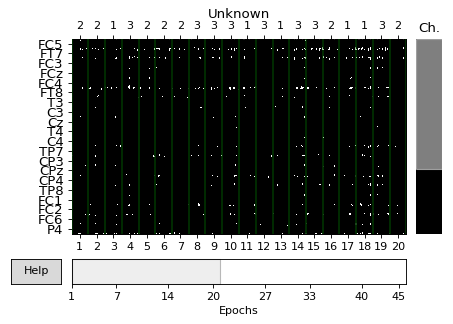

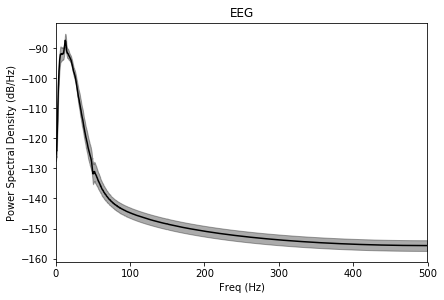

1


In [46]:
test2  = converter(test)
epochs = test2.get_epochs()
picks = mne.pick_types(info=test2.get_mne_info(), meg=False, eeg=True, misc=False)
epochs.plot(picks=picks, scalings='auto', show=True, block=True)
epochs.plot_psd(tmax=np.inf)
print '1'

In [50]:
epochs[u'правое']

<EpochsArray  |  n_events : 15 (all good), tmin : 0.0 (s), tmax : 4.499 (s), baseline : None, ~15.5 MB, data loaded>

In [51]:
picks = mne.pick_types(info=test2.get_mne_info(), meg=False, eeg=True, misc=False)
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

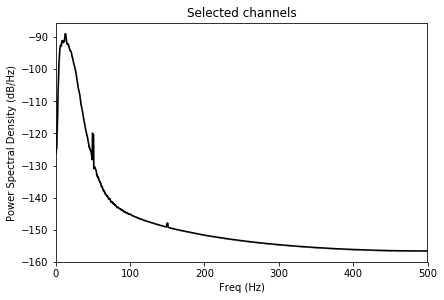

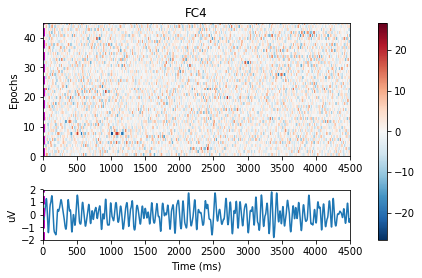

In [57]:
epochs.plot_psd(tmax=np.inf,picks=[0])
epochs.plot_image(4, cmap='interactive')